### Import Libraries

In [52]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
import lightgbm as lgb 
import category_encoders as ce
# Importando libs de plot
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set_style('darkgrid')
# sns.set_context('talk')
sns.set_palette('rainbow')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

### Reading Dataset

In [5]:
df = pd.read_csv('car_data.csv')

### EDA

In [6]:
df.shape

(354369, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [8]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [9]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [10]:
df.duplicated().sum()

262

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
(df
 .isna()
 .sum()
 .sort_values(ascending=False)
 .reset_index()
 .rename(columns = {'index' : "Column", 0 : "Missing"})
)

,Column,Missing
0,NotRepaired,71145
1,VehicleType,37484
2,FuelType,32889
3,Gearbox,19830
4,Model,19701
5,DateCrawled,0
6,Price,0
7,RegistrationYear,0
8,Power,0
9,Mileage,0


In [13]:
df.columns = df.columns.str.lower()

In [14]:
df['notrepaired'] = df['notrepaired'].fillna('other')

In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283875 entries, 2 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        283875 non-null  object
 1   price              283875 non-null  int64 
 2   vehicletype        283875 non-null  object
 3   registrationyear   283875 non-null  int64 
 4   gearbox            283875 non-null  object
 5   power              283875 non-null  int64 
 6   model              283875 non-null  object
 7   mileage            283875 non-null  int64 
 8   registrationmonth  283875 non-null  int64 
 9   fueltype           283875 non-null  object
 10  brand              283875 non-null  object
 11  notrepaired        283875 non-null  object
 12  datecreated        283875 non-null  object
 13  numberofpictures   283875 non-null  int64 
 14  postalcode         283875 non-null  int64 
 15  lastseen           283875 non-null  object
dtypes: int64(7), object(9)
me

In [17]:
df.head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,other,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
5,04/04/2016 17:36,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,04/04/2016 00:00,0,33775,06/04/2016 19:17
6,01/04/2016 20:48,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,01/04/2016 00:00,0,67112,05/04/2016 18:18


In [18]:
df['price'].mean()

4847.349572875385

In [19]:
df['price'].median()

3199.0

In [20]:
df['numberofpictures'].value_counts()

numberofpictures
0    283875
Name: count, dtype: int64

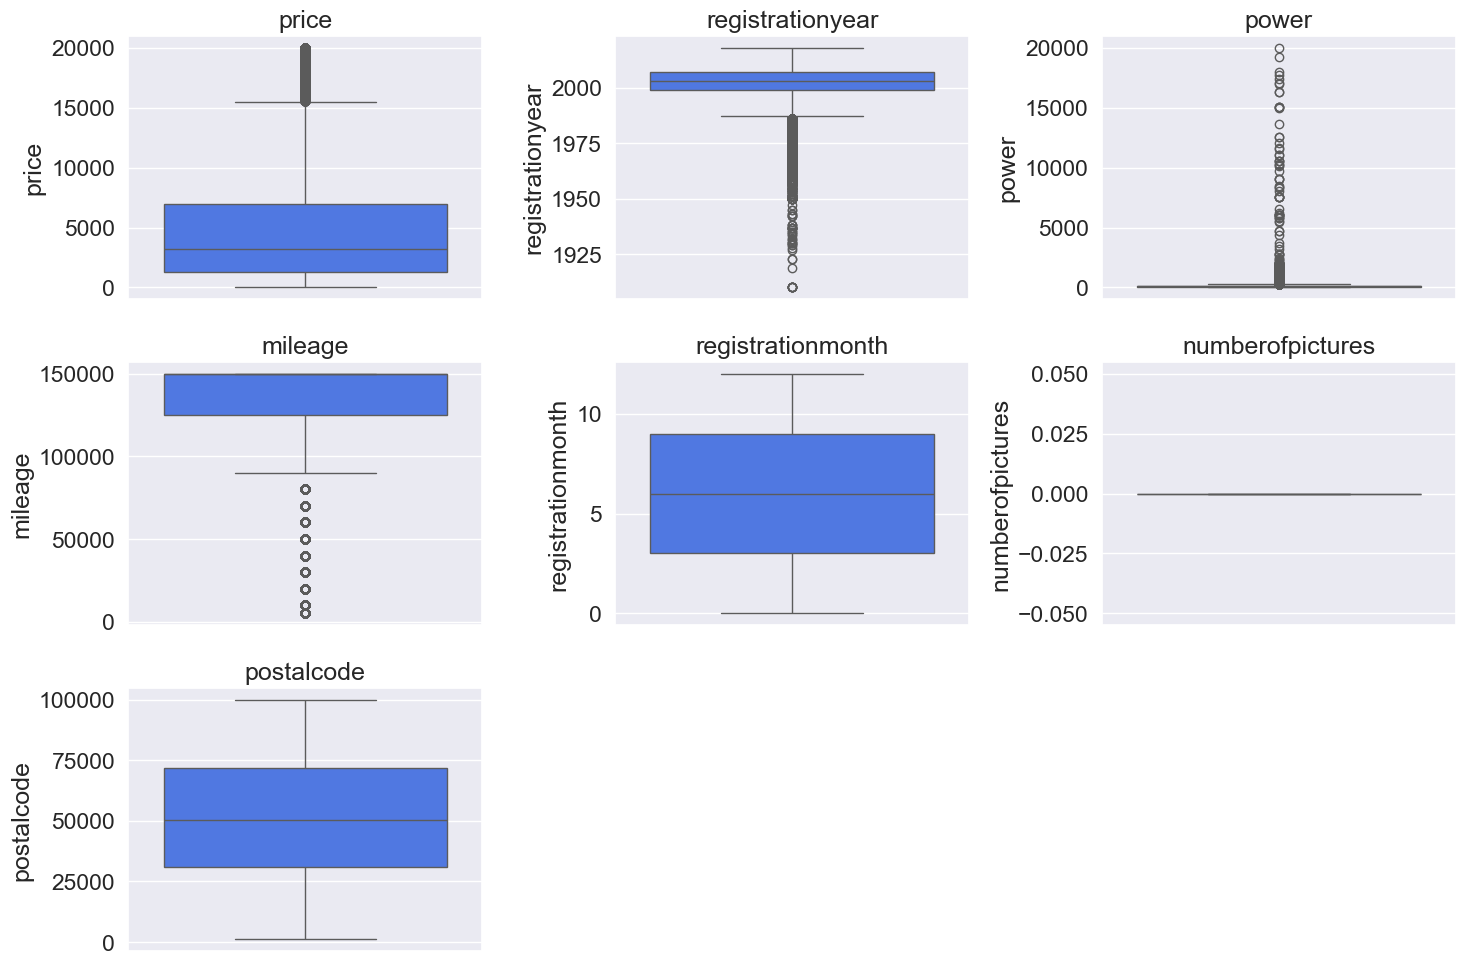

In [21]:
numeric_cols = df.select_dtypes('int64').columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'{col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

In [22]:
def detect_outliers(df):
    outliers_dict = {}
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_dict[col] = outliers.index
    return outliers_dict

outliers = detect_outliers(df[numeric_cols])
outliers_count = {col: len(outliers[col]) for col in numeric_cols}
outliers_percent = {col: (count / len(df) * 100) for col, count in outliers_count.items()}

In [23]:
for col, perc in outliers_percent.items():
    print(f'{col}: {perc:.2f}% of data would be discarded when removing outliers')

price: 4.38% of data would be discarded when removing outliers
registrationyear: 1.43% of data would be discarded when removing outliers
power: 2.18% of data would be discarded when removing outliers
mileage: 15.15% of data would be discarded when removing outliers
registrationmonth: 0.00% of data would be discarded when removing outliers
numberofpictures: 0.00% of data would be discarded when removing outliers
postalcode: 0.00% of data would be discarded when removing outliers


Text(0.5, 1.0, 'Mileage vs Price')

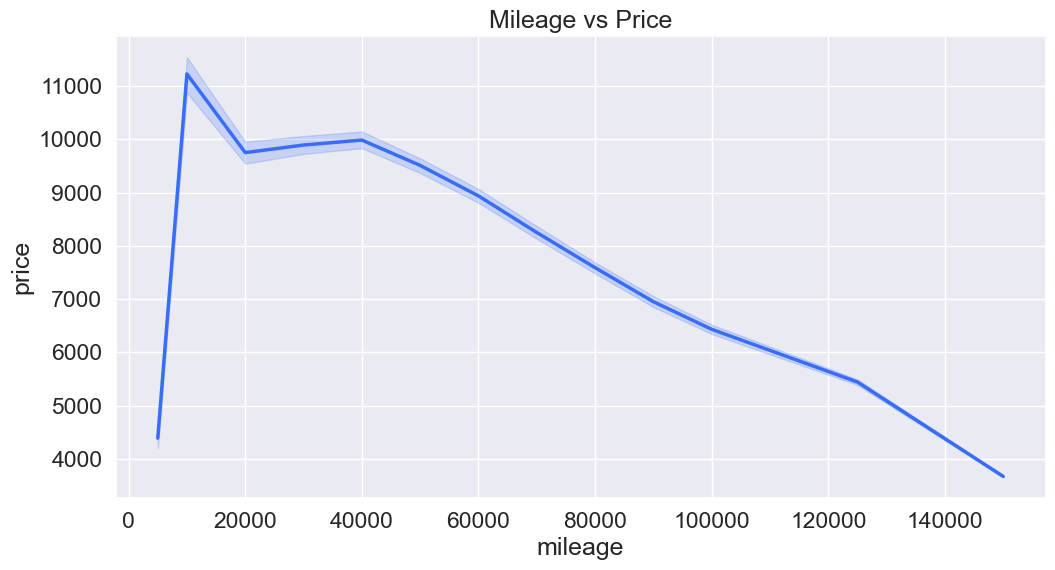

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='mileage', y='price', data=df);
plt.title('Mileage vs Price')

Text(0.5, 1.0, 'Registration Year vs Price')

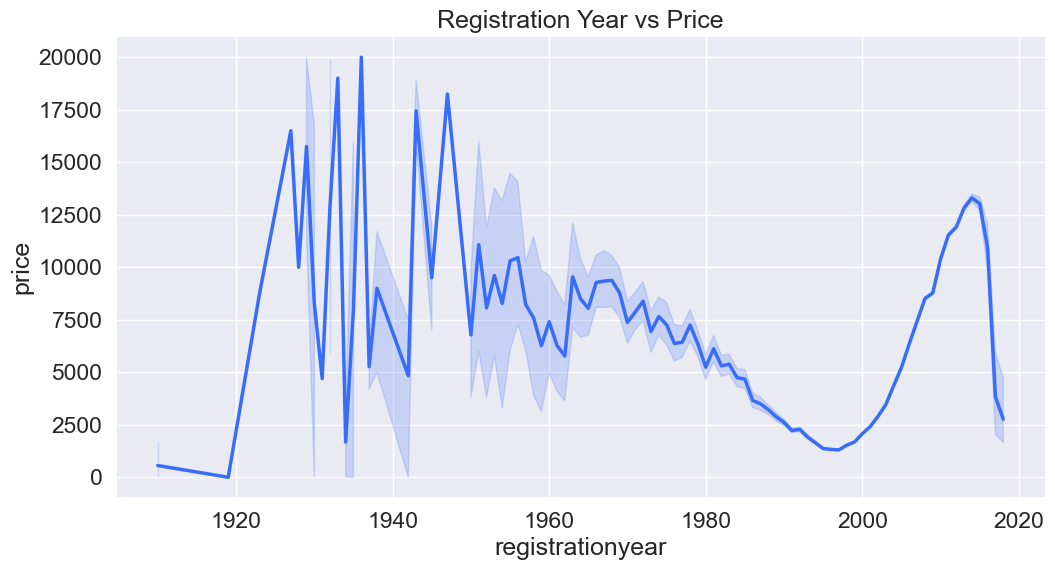

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='registrationyear', y="price", data=df);
plt.title('Registration Year vs Price')

### Train / Validation / Test

In [26]:
FEATURES = ['vehicletype', 'registrationyear', 'gearbox', 'power', 'model', 'mileage', 'fueltype', 'brand', 'notrepaired']
TARGET = ['price']

CATEGORICAL_FEATURES = df[FEATURES].select_dtypes('object').columns

In [27]:
X_train_val, X_test, y_train_val, y_test = train_test_split(df[FEATURES], df[TARGET], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

### Encoding

In [28]:
encoder = ce.CatBoostEncoder(cols=CATEGORICAL_FEATURES)
encoder.fit(X_train, y_train)

X_train = encoder.transform(X_train)
X_train_val = encoder.transform(X_train_val)
X_test = encoder.transform(X_test)
X_val = encoder.transform(X_val)

### Hyperparameter Tuning

In [29]:
def perform_gs(model, param_grid, X, y):
    gs = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=10)
    gs.fit(X, y)
    best_model = gs.best_estimator_
    best_params = gs.best_params_
    best_score = gs.best_score_
    return best_model, best_params, best_score

### CatBoost

In [30]:
cb = CatBoostRegressor(verbose=100)
params = {
    'depth': [6, 10],
    'learning_rate': [0.1, 0.5],
    'iterations': [100, 1000],
    'l2_leaf_reg': [0.5, 1.0]
}

In [31]:
best_model, best_params, best_score = perform_gs(cb, params, X_train_val, y_train_val)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
0:	learn: 4296.4145157	total: 170ms	remaining: 2m 50s
100:	learn: 1655.5931707	total: 3.62s	remaining: 32.2s
200:	learn: 1565.3066632	total: 6.54s	remaining: 26s
300:	learn: 1513.8341544	total: 9.5s	remaining: 22.1s
400:	learn: 1472.0437432	total: 12.6s	remaining: 18.8s
500:	learn: 1440.8593701	total: 15.5s	remaining: 15.4s
600:	learn: 1415.3794006	total: 18.5s	remaining: 12.3s
700:	learn: 1393.5500809	total: 21.5s	remaining: 9.15s
800:	learn: 1374.5896508	total: 24.5s	remaining: 6.09s
900:	learn: 1359.0403119	total: 27.7s	remaining: 3.05s
999:	learn: 1345.1069480	total: 30.7s	remaining: 0us


In [32]:
print(f'Best params: {best_params}')
print(f'Best RMSE', {best_score})

Best params: {'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 0.5, 'learning_rate': 0.1}
Best RMSE {-1597.3229153965976}


### LightGBM

In [33]:
lg = lgb.LGBMRegressor(verbose=-1)
params = {
    'learning_rate': [0.01, 0.5], 
    'num_leaves': [24, 80],
    'max_depth': [5, 30],
    'n_estimators': [50, 1000],
}

In [34]:
best_model, best_params, best_score = perform_gs(lg, params, X_train_val, y_train_val)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [35]:
print(f'Best params: {best_params}')
print(f'Best RMSE', {best_score})

Best params: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 1000, 'num_leaves': 24}
Best RMSE {-1641.4485831756733}


### Gradient Boosting

### LinearRegression

In [36]:
lr = LinearRegression()
lr.fit(X_train_val, y_train_val)
lr_pred = lr.predict(X_val)

In [37]:
lr_rmse = mse(y_val, lr_pred) ** 0.5
lr_rmse

2941.603165567877

### CatBoost

In [38]:
cb = CatBoostRegressor(loss_function='RMSE', iterations=1000, depth=10, l2_leaf_reg=0.5, learning_rate=0.1)
cb.fit(X_train_val, y_train_val, verbose=100)
cb_pred = cb.predict(X_val)

0:	learn: 4296.4145157	total: 32.3ms	remaining: 32.3s
100:	learn: 1655.5931707	total: 3.14s	remaining: 27.9s
200:	learn: 1565.3066632	total: 6.6s	remaining: 26.2s
300:	learn: 1513.8341544	total: 10.5s	remaining: 24.3s
400:	learn: 1472.0437432	total: 14.1s	remaining: 21s
500:	learn: 1440.8593701	total: 17.2s	remaining: 17.1s
600:	learn: 1415.3794006	total: 20.2s	remaining: 13.4s
700:	learn: 1393.5500809	total: 23.3s	remaining: 9.94s
800:	learn: 1374.5896508	total: 26.3s	remaining: 6.54s
900:	learn: 1359.0403119	total: 29.7s	remaining: 3.26s
999:	learn: 1345.1069480	total: 32.7s	remaining: 0us


In [39]:
cb_rmse = mse(y_val, cb_pred) ** 0.5
cb_rmse

1348.0090043764849

### LightGBM

In [41]:
train_data = lgb.Dataset(X_train_val, label=y_train_val)
test_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

params = { 
    'objective': 'regression', 
    'metric': 'rmse', 
    'boosting_type': 'gbdt', 
    'num_leaves': 24, 
    'max_depth': 5,
    'learning_rate': 0.05, 
    'n_estimators': 1000,
    'verbose': -1
} 

num_round = 100
boosting = lgb.train(params, train_data, num_round, valid_sets=[test_data], callbacks=[lgb.early_stopping(stopping_rounds=10)])

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 1610.28


In [42]:
lg = lgb.LGBMRegressor(metric='rmse', num_leaves=24, max_depth=5, learning_rate=0.5, n_estimators=1000, verbose=-1)
lg.fit(X_train_val, y_train_val)
lg_pred = lg.predict(X_val)

In [43]:
lg_rmse = mse(y_val, lg_pred) ** 0.5
lg_rmse

1404.2421579306983

### Model Analysis

### LinearRegression

In [44]:
lr = LinearRegression()
lr.fit(X_train_val, y_train_val)
lr_pred = lr.predict(X_test)

In [45]:
lr_rmse = mse(y_test, lr_pred) ** 0.5
lr_rmse

2904.17011892264

### CatBoost

In [46]:
%%time

cb = CatBoostRegressor(loss_function='RMSE', iterations=1000, depth=10, l2_leaf_reg=0.5, learning_rate=0.1)
cb.fit(X_train_val, y_train_val, verbose=100)
cb_pred = cb.predict(X_test)

0:	learn: 4296.4145157	total: 35.6ms	remaining: 35.6s
100:	learn: 1655.5931707	total: 4.2s	remaining: 37.4s
200:	learn: 1565.3066632	total: 7.77s	remaining: 30.9s
300:	learn: 1513.8341544	total: 11.4s	remaining: 26.4s
400:	learn: 1472.0437432	total: 15.3s	remaining: 22.9s
500:	learn: 1440.8593701	total: 19.9s	remaining: 19.8s
600:	learn: 1415.3794006	total: 23.8s	remaining: 15.8s
700:	learn: 1393.5500809	total: 27.2s	remaining: 11.6s
800:	learn: 1374.5896508	total: 30.5s	remaining: 7.58s
900:	learn: 1359.0403119	total: 34.8s	remaining: 3.82s
999:	learn: 1345.1069480	total: 38s	remaining: 0us
CPU times: total: 1min 40s
Wall time: 38.7 s


In [47]:
cb_rmse = mse(y_test, cb_pred) ** 0.5
cb_rmse

1562.265902010746

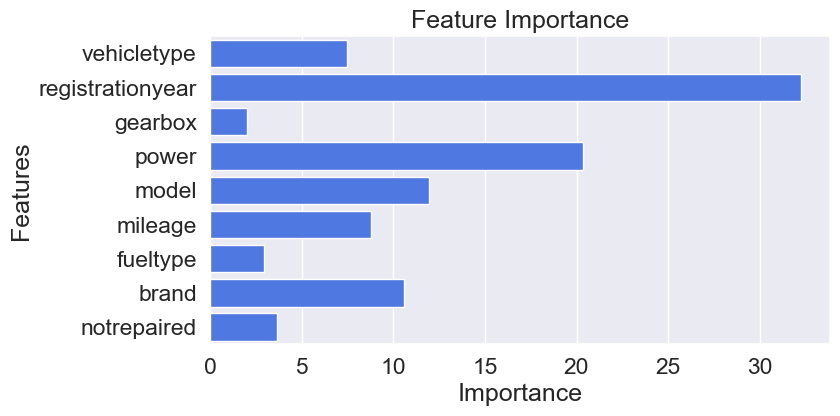

In [48]:
feature_importance = cb.get_feature_importance()
features_names = df[FEATURES].columns

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=feature_importance, y=features_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features');

### LightGBM

In [49]:
%%time

lg = lgb.LGBMRegressor(metric='rmse', num_leaves=24, max_depth=5, learning_rate=0.5, n_estimators=1000, verbose=-1)
lg.fit(X_train_val, y_train_val)
lg_pred = lg.predict(X_test)

CPU times: total: 13.5 s
Wall time: 4.73 s


In [50]:
lg_rmse = mse(y_test, lg_pred) ** 0.5
lg_rmse

1608.193420509126

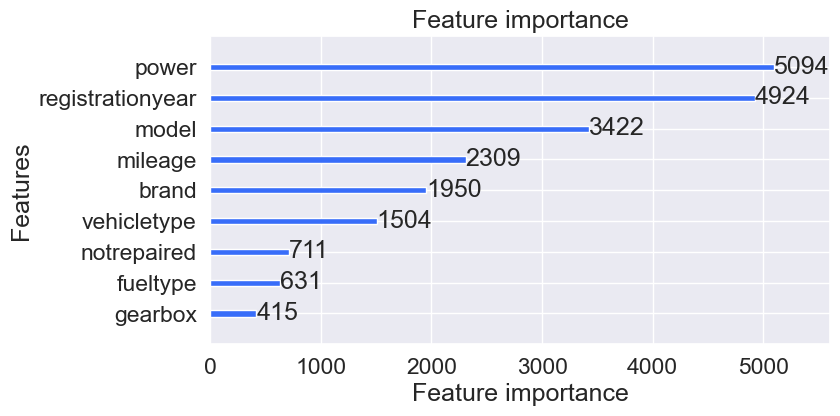

In [51]:
fig, ax = plt.subplots(figsize=(8, 4))
lgb.plot_importance(lg, ax=ax);

## Conclusion

It can be concluded that even though the CatBoost model has a slightly lower RMSE than LightGBM, when analyzing and comparing the models' execution time, the best choice for this case is LightGBM.